# **Symulacja rozwoju agresji w odniesieniu do teorii gier** 
***




### **Założenia projektu**
1. Przedstawienie różnych wzorców zachowań, obecnych w naturalnych ekosystemach
2. Zbadanie zależności między poziomem agresji, a skuecznością w walce o przetrwanie
3. Obserwacja interakcji międzygatunkowej
4. Znalezienie punktu stabilności ekosystemowej (równowagi Nasha)
5. Obserwacja reakcji modelu na zmiany parametrów początkowych
6. Odniesienie wyników ciekawych interakcji do problemów teorii gier
***

### **Opis modelu**
* Tworzymy planszę (ograniczony obszar) podzielony na pola
* Na każdym polu znajduje się jedzenie
* Gatunki codziennie wychodzą na planszę, by się pożywić
* Jeśli dwa osobniki spotkają się na jednym polu dochodzi do interakcji między nimi
* Wynik interakcji (śmierć, przeżycie, rozmnożenie) zależy od charakteru osobników
***

## **Symulacja**
Pierwsza symulacja przyjmuje najbardziej uproszczony, podstawowy scenariusz. 
Biorą w niej udział tylko dwa skrajne gatunki - pasywny (zielony) i agresywny (pomarańczowy).
Interakcje między nimi przedstawia poniższa tabela, oznaczmy odpowiednio:
* 0 - osobnik nie zjadł jedzenia, umiera
* 0.5 - osobnik zjadł pół porcji jedzenia, ma 1/2 szansy na przetrwanie
* 1 - osobnik zjadł jedną porcję jedzenia, przetrwa do następnego dnia, ale się nie rozmnoży
* 1.5 - osobnik zjadł półtorej porcji jedzenia, przetrwa do następnego dnia i ma 1/2 szansy na rozmnożenie



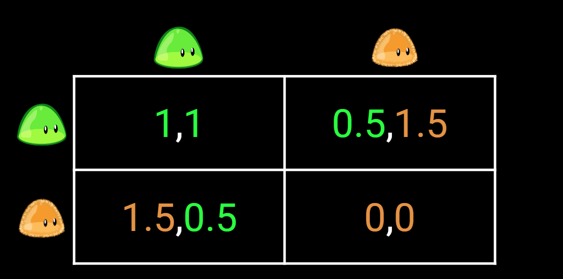

### Tworzenie planszy

#### *Opis funkcji*


#### Funkcja tworzy planszę (kwadratową) o podanej przez argument ***wielkosc_planszy*** długości boku

In [3]:
function tworzenie_planszy(wielkosc_planszy)|
    ["n" for a in 1:wielkosc_planszy^2]
end

tworzenie_planszy (generic function with 1 method)

### Losowanie

#### Funkcja rozlosowywująca wszystkie gatunki w danym momencie do miejsc na ***planszy***, powodująca zajęcie miejsc na niej i wygenerowanie spotkań między gatunkami
* pola ze wszystkimi jedzonkami są umieszczone w wektorze ***mozliwosci***, do których przyporządkowywane są gatunki

* przyporządkowanie do pola oznaczane jest przez dodanie/dopisanie w miejscu tego pola w wektorze pierwszą literę nazwy tego gatunku

* jeśli wszystkie pola zostaną przyporządkowane, każdy kolejny gatunek siłą rzeczy musi umrzeć (ponieważ nie ma wolnego pola na mapie, gdzie znalazłby jedzenie) 

In [4]:
function losowanie(wielkosc_planszy)
    global plansza = tworzenie_planszy(wielkosc_planszy)
    mozliwosci = []
    szansa = []
    for b in 1:wielkosc_planszy^2
        push!(mozliwosci, b)
        push!(mozliwosci, b)
        push!(szansa, b)
    end
    for dove in 1:populacja_dove
        if mozliwosci != []
            dove1 = rand(mozliwosci,1)
            for (indeks, wartosc) in enumerate(mozliwosci)
                if wartosc == dove1[1]
                    deleteat!(mozliwosci, indeks)
                    break
                end
            end
            if plansza[dove1[1]] == "n"
                plansza[dove1[1]] = "D"
            else
                plansza[dove1[1]] *= "D"
            end
        else
            global populacja_dove -= 1
        end
    end
    for hawk in 1:populacja_hawk
        if mozliwosci != []
            hawk1 = rand(mozliwosci,1)
            for (indeks, wartosc) in enumerate(mozliwosci)
                if wartosc == hawk1[1]
                    deleteat!(mozliwosci, indeks)
                    break
                end
            end
            if plansza[hawk1[1]] == "n"
                plansza[hawk1[1]] = "H"
            else
                plansza[hawk1[1]] *= "H"
            end
        else
            global populacja_hawk -= 1
        end
    end
    for mewa in 1:populacja_mewa
        if mozliwosci != []
            mewa1 = rand(mozliwosci, 1)
            for (indeks, wartosc) in enumerate(mozliwosci)
                if wartosc == mewa1[1]
                    deleteat!(mozliwosci, indeks)
                    break
                end
            end
            if plansza[mewa1[1]] == "n"
                plansza[mewa1[1]] = "J"
                mewa2 = rand(szansa, 1)
                for (indeks1, wartosc1) in enumerate(mozliwosci)
                    if wartosc1 == mewa2[1]
                        deleteat!(mozliwosci, indeks1)
                        break
                    end
                end
                if plansza[mewa2[1]] == "n"
                    plansza[mewa2[1]] = "M"
                elseif length(plansza[mewa2[1]]) == 2              
                    global populacja_mewa -= 1
                else
                    if mewa2[1] == mewa1[1]
                        plansza[mewa2[1]] *= "2"
                    else
                        plansza[mewa2[1]] *= "M"
                    end
                end
            else
                plansza[mewa1[1]] *= "M"
            end
        else
            global populacja_mewa -= 1
        end
    end
    for kruk in 1:populacja_kruk
        if mozliwosci != []
            kruk1 = rand(mozliwosci, 1)
            for (indeks, wartosc) in enumerate(mozliwosci)
                if wartosc == kruk1[1]
                    deleteat!(mozliwosci, indeks)
                    break
                end
            end
            if plansza[kruk1[1]] == "n"
                plansza[kruk1[1]] = "K"
            else                      
                plansza[kruk1[1]] *= "K"
            end
        else
            global populacja_kruk -= 1
        end
    end
    for alt in 1:populacja_alt
        if mozliwosci != []
            alt1 = rand(mozliwosci, 1)
            for (indeks, wartosc) in enumerate(mozliwosci)
                if wartosc == alt1[1]
                    deleteat!(mozliwosci, indeks)
                    break
                end
            end
            if plansza[alt1[1]] == "n"
                plansza[alt1[1]] = "A"
            else                      
                plansza[alt1[1]] *= "A"
            end
        else
            global populacja_alt -= 1
        end
    end
    for eagle in 1:populacja_eagle
        if mozliwosci != []
            eagle1 = rand(mozliwosci, 1)
            for (indeks, wartosc) in enumerate(mozliwosci)
                if wartosc == eagle1[1]
                    deleteat!(mozliwosci, indeks)
                    break
                end
            end
            if plansza[eagle1[1]] == "n"
                plansza[eagle1[1]] = "E"
            else                     
                plansza[eagle1[1]] *= "E"
            end
        else
            global populacja_eagle -= 1
        end
    end
    for sep in 1:populacja_sep
        if mozliwosci != []
            sep1 = rand(szansa, 1)
            if sep1[1] ∈ mozliwosci
                for (indeks, wartosc) in enumerate(mozliwosci)
                    if wartosc == sep1[1]
                        deleteat!(mozliwosci, indeks)
                        break
                    end
                end
                if plansza[sep1[1]] == "n"
                    plansza[sep1[1]] = "S"
                else
                    plansza[sep1[1]] *= "S"
                end
            else
                if length(plansza[sep1[1]]) == 2
                    plansza[sep1[1]] *= "S"
                else
                    global populacja_sep -= 1
                end
            end
        else
            global populacja_sep -= 1
        end
    end 
end

losowanie (generic function with 1 method)

### Procesy

#### Funkcja  

#### Funkcja odpowiedzialna za wyegzekwowanie procesów zachodzących w ekosystemie po wylosowaniu ich na mapę
* każda interakcja jest opisana osobnym przypadkiem oraz ma swoje własne konsekwencje dla poszczególnych gatunków

* jeśli do pewnego pola nie zostanie przydzielony żaden gatunek, jedzenie na nim się marnuje (w danym dniu, w następnym normalnie się na nim pojawia)

* argument **alt** determinuje, czy w danej symulacji altruiści mogą rodzić się z innych gatunków, gdy znajdują one oba jedzenia na polu (jeśli **alt**=*true*, tak się będzie dziać; jeśli **alt**=*false*, altruiści mogą się rodzić jedynie "z samych siebie")

In [18]:
function procesy(plansza, alt=false)
    if alt
        temp = rand(1:30)
        for i in plansza
            if i == "n"
                continue
            #dove
            elseif i == "D"
                p = rand(1:4)
                if p == 1
                    global populacja_alt += 1
                else
                    global populacja_dove += 1
                end
            elseif i == "DD"
                continue
            #hawk
            elseif i == "H"
                p = rand(1:4)
                if p == 1
                    global populacja_alt += 1
                else
                    global populacja_hawk += 1
                end
            elseif i == "HH"
                global populacja_hawk -= 2
            elseif i == "DH"
                p = rand(1:2)
                if p == 1
                    global populacja_dove -= 1
                    global populacja_hawk += 1
                else
                    continue
                end
            #mewa
            elseif i == "J"
                p = rand(1:4)
                if p == 1
                    global populacja_alt += 1
                else
                    global populacja_mewa += 1
                end
            elseif i == "M"
                p = rand(1:4)
                if p == 1
                    global populacja_alt += 1
                else
                    global populacja_mewa += 1
                end
            elseif i == "MM"
                global populacja_mewa -= 2
            elseif i == "JM"
                continue
            elseif i == "J2"
                p = rand(1:2)
                if p == 1
                    global populacja_mewa += 1
                else
                    continue
                end
            elseif i == "DM" 
                p = rand(1:4)
                if p == 1
                    global populacja_mewa += 1
                    global populacja_dove -= 1
                else
                    continue
                end
            elseif i == "HM"
                p = rand(1:4)
                if p == 1
                    global populacja_mewa += 1
                    global populacja_hawk -= 1
                else
                    global populacja_hawk += 1
                    global populacja_mewa -= 1
                end
            #kruk 
            elseif i == "K"
                if temp <= 10
                    continue
                elseif 10 < temp <= 20
                    p = rand(1:4)
                    if p == 1
                        global populacja_alt += 1
                    else
                        global populacja_kruk += 1
                    end
                else
                    p = rand(1:2)
                    if p == 1
                        q = rand(1:4)
                        if q == 1
                            global populacja_alt += 1
                        else
                            global populacja_kruk += 1 
                        end
                    else
                        continue
                    end
                end
            elseif i == "KK"
                if temp <= 10
                    continue
                elseif 10 < temp <= 20
                    global populacja_kruk -= 2
                else
                    global populacja_kruk -= 1
                end
            elseif i == "DK"
                if 10 < temp <= 20
                    global populacja_kruk += 1
                    global populacja_dove -= 1
                else
                    continue
                end
            elseif i == "HK"
                if 10 < temp <= 20
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk -= 1
                        global populacja_hawk += 1
                    else
                        global populacja_kruk += 1
                        global populacja_hawk -= 1
                    end
                else
                    q = rand(1:3)
                    if q == 1
                        global populacja_kruk += 1
                        global populacja_hawk -= 1
                    else
                        global populacja_kruk -= 1
                        global populacja_hawk += 1
                    end
                end
            elseif i == "MK"
                if temp <= 10
                    p = rand(1:3)
                    if p == 1
                        continue
                    else
                        global populacja_kruk -= 1
                        global populacja_mewa += 1
                    end
                elseif 10 < temp <= 20
                    global populacja_mewa -= 1
                    global populacja_kruk += 1
                else 
                    q = rand(1:3)
                    if q == 1
                        continue
                    else
                        global populacja_mewa -= 1
                        global populacja_kruk += 1
                    end
                end
            elseif i == "JK"
                if temp <= 10
                    p = rand(1:5)
                    if p <= 2
                        global populacja_mewa += 1
                        global populacja_kruk -= 1
                    else
                        global populacja_kruk += 1
                    end
                elseif 10 < temp <= 20
                    global populacja_kruk += 1
                else 
                    q = rand(1:4)
                    if q == 1
                        global populacja_mewa += 1
                        global populacja_kruk -= 1
                    else
                        global populacja_kruk += 1
                    end
                end
            #altruist
            elseif i == "A"
                global populacja_alt += 1
            elseif i == "AA"
                continue
            elseif i == "DA"
                global populacja_dove += 1
                global populacja_alt -= 1
            elseif i == "HA"
                global populacja_hawk += 1
                global populacja_alt -= 1
            elseif i == "MA"
                global populacja_mewa += 1
                global populacja_alt -= 1
            elseif i == "JA"
                p = rand(1:2)
                if p == 1
                    global populacja_mewa += 1
                    global populacja_alt -= 1
                else
                    continue
                end
            elseif i == "KA"
                global populacja_kruk += 1
                global populacja_alt -= 1
            #eagle
            elseif i == "E"
                global populacja_eagle -= 1
            elseif i == "EE"
                global populacja_eagle -= 2
            elseif i == "DE"
                global populacja_eagle += 1
                global populacja_dove -= 1
            elseif i == "HE"
                p = rand(1:3)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_hawk -= 1
                else
                    continue
                end
            elseif i == "ME"
                p = rand(1:2)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_mewa -= 1
                else
                    continue
                end
            elseif i == "JE"
                global populacja_eagle += 1
            elseif i == "KE"
                if temp <= 10
                    global populacja_kruk -= 1
                    global populacja_eagle += 1
                elseif 10 < temp <= 20
                    p = rand(1:3)
                    if p == 1
                        global populacja_kruk -= 1
                        global populacja_eagle += 1
                    else
                        continue
                    end
                else
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk -= 1 
                        global populacja_eagle += 1
                    else
                        continue
                    end
                end
            elseif i == "AE"
                global populacja_eagle += 1
                global populacja_alt -= 1
            #sep
            elseif i == "S"
                global populacja_sep -= 1
            elseif i == "SS"
                global populacja_sep -= 2
            elseif i == "SSS"
                global populacja_sep -= 1
            #podwojne zaleznosci
            elseif i == "DS"
                p = rand(1:4)
                if p == 1
                    global populacja_sep += 1
                    global populacja_dove -= 1
                else
                    continue
                end
            elseif i == "HS"
                p = rand(1:4)
                if p == 1
                    global populacja_sep += 1
                    global populacja_hawk -= 1
                else
                    global populacja_hawk += 1
                    global populacja_sep -= 1
                end
            elseif i == "MS"
                global populacja_mewa -= 1
                global populacja_sep -= 1
            elseif i == "JS"
                global populacja_sep -= 1
            elseif i == "KS"
                if temp <= 10
                    p = rand(1:3)
                    if p == 1
                        continue
                    else
                        global populacja_kruk -= 1
                        global populacja_sep += 1
                    end
                elseif 10 < temp <= 20
                    global populacja_sep -= 1
                    global populacja_kruk += 1
                else 
                    q = rand(1:3)
                    if q == 1
                        continue
                    else
                        global populacja_sep -= 1
                        global populacja_kruk += 1
                    end
                end
            elseif i == "AS"
                global populacja_sep += 1
                global populacja_alt -= 1
            elseif i == "ES"
                p = rand(1:2)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_sep -= 1
                else
                    continue
                end
            #potrojne zaleznosci
            elseif i == "DDS"
                global populacja_sep -= 1
            elseif i == "DHS"
                p = rand(1:2)
                if p == 1
                    global populacja_dove -= 1
                    global populacja_hawk += 1
                    global populacja_sep += 1
                else
                    global populacja_sep -= 1
                end
            elseif i == "HHS"
                global populacja_hawk -= 2
                global populacja_sep += 1
            elseif i == "DMS"
                p = rand(1:4)
                if p == 1
                    global populacja_mewa += 1
                    global populacja_dove -= 1
                    global populacja_sep += 1
                else
                    global populacja_sep -= 1
                end
            elseif i == "HMS"
                p = rand(1:4)
                if p == 1
                    global populacja_mewa += 1
                    global populacja_hawk -= 1
                    global populacja_sep += 1
                else
                    global populacja_hawk += 1
                    global populacja_mewa -= 1
                    global populacja_sep += 1
                end
            elseif i == "MMS"
                global populacja_mewa -= 2
                global populacja_sep += 1
            elseif i == "J2S"
                p = rand(1:2)
                if p == 1
                    global populacja_mewa += 1
                    global populacja_sep -= 1
                else
                    continue
                end
            elseif i == "JMS"
                continue
            elseif i == "DKS"
                if 10 < temp <= 20
                    global populacja_kruk += 1
                    global populacja_dove -= 1
                    global populacja_sep += 1
                else
                    global populacja_sep -= 1
                end
            elseif i == "HKS"
                if 10 < temp <= 20
                    p = rand(1:4)
                    if p == 1
                        global populacja_kruk -= 1
                        global populacja_hawk += 1
                        global populacja_sep += 1
                    else
                        global populacja_kruk += 1
                        global populacja_hawk -= 1
                        global populacja_sep += 1
                    end
                else
                    q = rand(1:3)
                    if q == 1
                        global populacja_kruk += 1
                        global populacja_hawk -= 1
                        global populacja_sep += 1
                    else
                        global populacja_kruk -= 1
                        global populacja_hawk += 1
                        global populacja_sep += 1
                    end
                end
            elseif i == "MKS"
                if temp <= 10
                    p = rand(1:3)
                    if p == 1
                        global populacja_sep -= 1
                    else
                        global populacja_kruk -= 1
                        global populacja_mewa += 1
                        global populacja_sep += 1
                    end
                elseif 10 < temp <= 20
                    global populacja_mewa -= 1
                    global populacja_kruk += 1
                    global populacja_sep += 1
                else 
                    q = rand(1:3)
                    if q == 1
                        global populacja_sep -= 1
                    else
                        global populacja_mewa -= 1
                        global populacja_kruk += 1
                        global populacja_sep += 1
                    end
                end
            elseif i == "JKS"
                if temp <= 10
                    p = rand(1:5)
                    if p <= 2
                        global populacja_mewa += 1
                        global populacja_kruk -= 1
                        global populacja_sep += 1
                    else
                        global populacja_kruk += 1
                    end
                elseif 10 < temp <= 20
                    global populacja_kruk += 1
                else 
                    q = rand(1:4)
                    if q == 1
                        global populacja_mewa += 1
                        global populacja_kruk -= 1
                        global populacja_sep += 1
                    else
                        global populacja_kruk += 1
                    end
                end
            elseif i == "KKS"
                if temp <= 10
                    global populacja_sep -= 1
                elseif 10 < temp <= 20
                    global populacja_kruk -= 2
                    global populacja_sep += 1
                else
                    global populacja_kruk -= 1
                    global populacja_sep += 1
                end
            elseif i == "DAS"
                global populacja_dove += 1
                global populacja_alt -= 1
                global populacja_sep += 1
            elseif i == "HAS"
                global populacja_hawk += 1
                global populacja_alt -= 1
                global populacja_sep += 1
            elseif i == "MAS"
                global populacja_mewa += 1
                global populacja_alt -= 1
                global populacja_sep += 1
            elseif i == "JAS"
                global populacja_mewa += 1
                global populacja_alt -= 1
                global populacja_sep += 1
            elseif i == "KAS"
                global populacja_kruk += 1
                global populacja_alt -= 1
                global populacja_sep += 1
            elseif i == "AAS"
                global populacja_sep -= 1
            elseif i == "DES"
                global populacja_eagle += 1
                global populacja_dove -= 1
                global populacja_sep += 1
            elseif i == "HES"
                p = rand(1:3)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_hawk -= 1
                    global populacja_sep += 1
                else
                    global populacja_sep -= 1
                end
            elseif i == "MES"
                p = rand(1:2)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_mewa -= 1
                    global populacja_sep += 1
                else
                    global populacja_sep -= 1
                end
            elseif i == "JES"
                global populacja_eagle += 1
            elseif i == "AES"
                global populacja_eagle += 1
                global populacja_alt -= 1
                global populacja_sep += 1
            elseif i == "EES"
                global populacja_eagle -= 2
                global populacja_sep += 1
            elseif i == "DSS"
                global populacja_dove -= 1
            elseif i == "HSS"
                p = rand(1:2)
                if p == 1
                    global populacja_hawk -= 1
                else
                    global populacja_sep -= 1
                end
            elseif i == "MSS"
                global populacja_mewa -= 1
            elseif i == "JSS"
                global populacja_sep -= 1
            elseif i == "KSS"
                if 10 < temp <= 20
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk -= 1
                    else
                        global populacja_sep -= 1
                    end
                else
                    global populacja_kruk -= 1
                end
            elseif i == "ASS"
                global populacja_alt -= 1
            elseif i == "ESS"
                global populacja_eagle -= 1
                global populacja_sep -= 1
            end
        end
    else
        temp = rand(1:30)
        for i in plansza
            if i == "n"
                continue
            #dove
            elseif i == "D"
                global populacja_dove += 1
            elseif i == "DD"
                continue
            #hawk
            elseif i == "HH"
                global populacja_hawk -= 2
            elseif i == "H"
                global populacja_hawk += 1
            elseif i == "DH"
                p = rand(1:2)
                if p == 1
                    global populacja_dove -= 1
                    global populacja_hawk += 1
                else
                    continue
                end
            #mewa
            elseif i == "M"
                global populacja_mewa += 1
            elseif i == "J"
                global populacja_mewa += 1
            elseif i == "MM"
                global populacja_mewa -= 2
            elseif i == "J2"
                p = rand(1:2)
                if p == 1
                    global populacja_mewa += 1
                else
                    continue
                end
            elseif i == "JM"
                p = rand(1:3)
                if p == 1
                    global populacja_mewa -= 1
                else
                    continue
                end
            elseif i == "DM"
                p = rand(1:3)
                if p == 1
                    global populacja_dove -= 1
                    global populacja_mewa += 1
                else
                    continue
                end
            elseif i == "HM"
                p = rand(1:2)
                if p == 1
                    global populacja_mewa -= 1
                    global populacja_hawk -= 1
                else
                    global populacja_hawk += 1
                end
            #kruk
            elseif i == "K"
                if temp <= 10
                    continue
                elseif 10 < temp <= 20
                    global populacja_kruk += 1
                else
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk += 1
                    else
                        continue
                    end
                end
            elseif i == "KK"
                if temp <= 10
                    continue
                elseif 10 < temp <= 20
                    global populacja_kruk -= 2
                else
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk -= 2
                    else
                        continue
                    end
                end
            elseif i == "MK"
                if temp <= 10
                    p = rand(1:3)
                    if p == 1
                        continue
                    else
                        global populacja_mewa += 1
                    end
                elseif 10 < temp <= 20
                    global populacja_mewa -= 1
                    global populacja_kruk += 1
                else 
                    q = rand(1:3)
                    if q == 1
                        global populacja_kruk -= 1
                    else
                        global populacja_mewa -= 1
                    end
                end
            elseif i == "JK"
                if temp <= 10
                    p = rand(1:4)
                    if p <= 2
                        global populacja_mewa += 1
                        global populacja_kruk -= 1
                    else
                        continue
                    end
                elseif 10 < temp <= 20
                    global populacja_kruk += 1
                else 
                    q = rand(1:4)
                    if q == 1
                        global populacja_mewa += 1
                        global populacja_kruk -= 1
                    else
                        continue
                    end
                end
            elseif i == "DK"
                if temp <= 10
                    p = rand(1:3)
                    if p == 1
                        continue
                    else
                        global populacja_kruk -= 1
                    end
                elseif 10 < temp <= 20
                    global populacja_dove -= 1
                    global populacja_kruk += 1
                else 
                    q = rand(1:3)
                    if q == 1
                        continue
                    else
                        global populacja_kruk += 1
                        global populacja_dove -= 1
                    end
                end
            elseif i == "HK"
                if 10 < temp <= 20
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk -= 1
                    else
                        global populacja_hawk -= 1
                    end
                else
                    q = rand(1:3)
                    if q == 1
                        continue
                    else
                        global populacja_kruk -= 1
                    end
                end
            #altruist
            elseif i == "A"
                global populacja_alt += 1
            elseif i == "AA"
                continue
            elseif i == "DA"
                global populacja_dove += 1
                global populacja_alt -= 1
            elseif i == "HA"
                global populacja_hawk += 1
                global populacja_alt -= 1
            elseif i == "MA"
                global populacja_mewa += 1
                global populacja_alt -= 1
            elseif i == "KA"
                global populacja_kruk += 1
                global populacja_alt -= 1
            #orzel
            elseif i == "E"
                global populacja_eagle += 1
            elseif i == "EE"
                global populacja_eagle -= 2
            elseif i == "DE"
                global populacja_eagle += 1
                global populacja_dove -= 1
            elseif i == "HE"
                p = rand(1:3)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_hawk -= 1
                else
                    continue
                end
            elseif i == "ME"
                p = rand(1:2)
                if p == 1
                    global populacja_eagle += 1
                    global populacja_mewa -= 1
                else
                    continue
                end
            elseif i == "JE"
                global populacja_eagle += 1
            elseif i == "KE"
                if temp <= 10
                    global populacja_kruk -= 1
                    global populacja_eagle += 1
                elseif 10 < temp <= 20
                    p = rand(1:3)
                    if p == 1
                        global populacja_kruk -= 1
                        global populacja_eagle += 1
                    else
                        continue
                    end
                else
                    p = rand(1:2)
                    if p == 1
                        global populacja_kruk -= 1 
                        global populacja_eagle += 1
                    else
                        continue
                    end
                end
            elseif i == "AE"
                global populacja_alt += 1
                global populacja_eagle -= 1
            end
        end
    end
end


procesy (generic function with 2 methods)

### Zmiany w przedziale czasu

#### Funkcja odpowiedzialna za wykonanie symulacji w zakresie dni podanej w argumencie **liczba_dni**

* w każdym dniu rozlosowywana na planszę jest cała populacja, aby do następnego dnia przterwało tyle osobników, ile zostanie po wykonaniu funkcji procesy

* podawane są opcjonalne argumenty *populacja_s* i *populacja_e*, które określają czy od pewnego dnia (według nas najbardziej optymalnym momentem jest 15. dzień
tuż przed pikiem ogółu społeczeństwa) mają zostać dodane do symulacji orły (eagle) oraz sępy (sep), które zależą z natury najbardziej od interakcji z innymi 
gatunkami, dlatego najlepiej funkcjonują, gdy ogólna liczba populacji jest duża

* podawany jest opcjonalny argument *alt*, który determinuje czy w tej symulacji altruiści mogą rodzić się z innych gatunków

In [19]:
function Zmiany_przez_dni(wielkosc_planszy, liczba_dni, populacja_s::Int64=0, populacja_e::Int64=0, alt=false)
    populacje_dove = []
    populacje_hawk = []
    populacje_mewa = []
    populacje_kruk = []
    populacje_alt = []
    populacje_eagle = []
    populacje_sep = []
    for f in 1:liczba_dni
        push!(populacje_dove, populacja_dove)
        push!(populacje_hawk, populacja_hawk)
        push!(populacje_mewa, populacja_mewa)
        push!(populacje_kruk, populacja_kruk)
        push!(populacje_alt, populacja_alt)
        if populacja_e > 0
            if f == 15
                global populacja_eagle = populacja_e
            end 
        end
        if populacja_s > 0
            if f == 15
                global populacja_sep = populacja_s
            end
        end
        push!(populacje_eagle, populacja_eagle)
        push!(populacje_sep, populacja_sep)
        losowanie(wielkosc_planszy)
        procesy(plansza, alt)
    end
    return populacje_dove, populacje_hawk, populacje_mewa, populacje_kruk, populacje_alt, populacje_eagle, populacje_sep
end

Zmiany_przez_dni (generic function with 4 methods)

Any[4002, 3859]

Any[4029]

### Funkcja rysująca wykres

#### Funkcja użytkownika stworzona, aby móc przedstawić wykres "warstwowy" (z zamalowanym obszarem) dla lepszej wizualizacji wyników symulacji

In [21]:
using Plots
@userplot StackedArea
 
@recipe function f(pc::StackedArea)
    wielkosc_planszy, y = pc.args
    n = length(wielkosc_planszy)
    y = cumsum(y, dims=2)
    seriestype := :shape
 
    for c=1:size(y,2)
        sx = vcat(wielkosc_planszy, reverse(wielkosc_planszy))
        sy = vcat(y[:,c], c==1 ? zeros(n) : reverse(y[:,c-1]))
        @series (sx, sy)
    end
end


#### Funkcja odpowiedzialna za wygenerowanie wykresu warstwowego dla symulacji z danymi podanymi przez użytkownika przy wywołaniu
* kolejne argumenty typu **populacje_** to wektory z podanymi kolejnymi wartościami liczby danej populacji zmieniające się w okresie czasowym

* górną granicą wykresu jest liczba jedzeń na całej planszy (2-krotność liczby pól na mapie)

* każdy gatunek jest oznaczony innym kolorem dla przejrzystości wyników

In [22]:
function StackedArea(populacje_dove, populacje_hawk, populacje_mewa, populacje_kruk, populacje_alt, populacje_eagle, populacje_sep)
    dni = []
    nazwy = ["dove", "hawk", "mewa", "kruk", "alt", "eagle", "sep"]
    append!(dni, i for i in 1:liczba_dni)
    plotly(
        ylimits=(0, 2*wielkosc_planszy^2),
    )
    stackedarea(dni, [populacje_dove populacje_hawk populacje_mewa populacje_kruk populacje_alt populacje_eagle populacje_sep], color = [:greens :orange :yellow :black :cyan :red :purple], labels = reshape(nazwy,(1,7)), legend= :outertopleft)
end

StackedArea

### Wywołanie

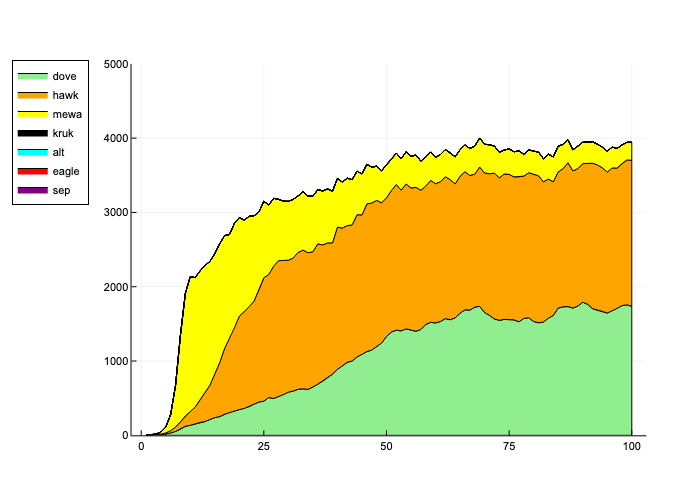

In [35]:
populacja_dove = 1
populacja_hawk = 1
populacja_mewa = 1
populacja_alt = 0
populacja_eagle =0
populacja_kruk = 0
populacja_sep = 0
liczba_dni = 100
wielkosc_planszy = 50
zmiany = Zmiany_przez_dni(wielkosc_planszy,liczba_dni,0,0)
StackedArea(zmiany[1], zmiany[2], zmiany[3], zmiany[4], zmiany[5], zmiany[6], zmiany[7])

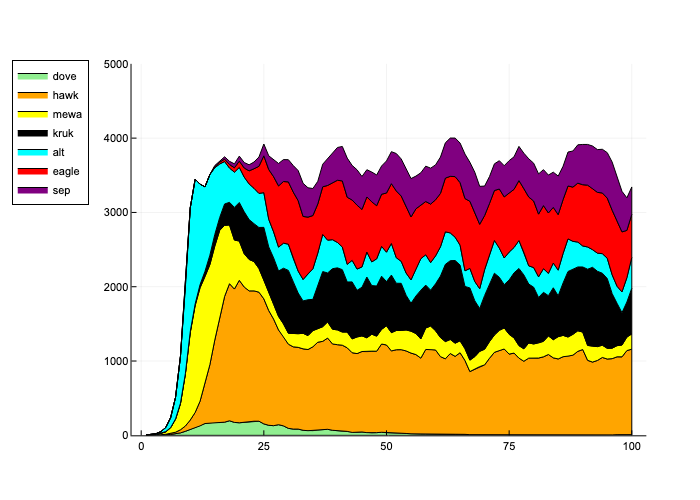

In [20]:
populacja_dove = 1
populacja_hawk = 1
populacja_mewa = 1
populacja_alt = 1
populacja_eagle = 0
populacja_kruk = 1
populacja_sep = 0
liczba_dni = 100
wielkosc_planszy = 50
zmiany = Zmiany_przez_dni(wielkosc_planszy,liczba_dni,15,15,true)
StackedArea(zmiany[1], zmiany[2], zmiany[3], zmiany[4], zmiany[5], zmiany[6], zmiany[7])


## **Wizualizacja wyników symulacji dla różnych parametrów**

### Parametry

In [77]:
WYKRES

UndefVarError: UndefVarError: WYKRES not defined

### Wnioski z wykresu

## **Równowaga Nasha**
Równowagą Nasha, w teorii gier, nazywamy sytuację, gdy strategia każdego gracza jest optymalna, a jej zmiana nie przyniesie korzyści żadnemu z graczy. W odniesieniu do naszego modelu, będzie to punkt, w którym osobnik, niezależnie od tego jaką taktykę przyjmie, ma stałą szansę na przetrwanie. 

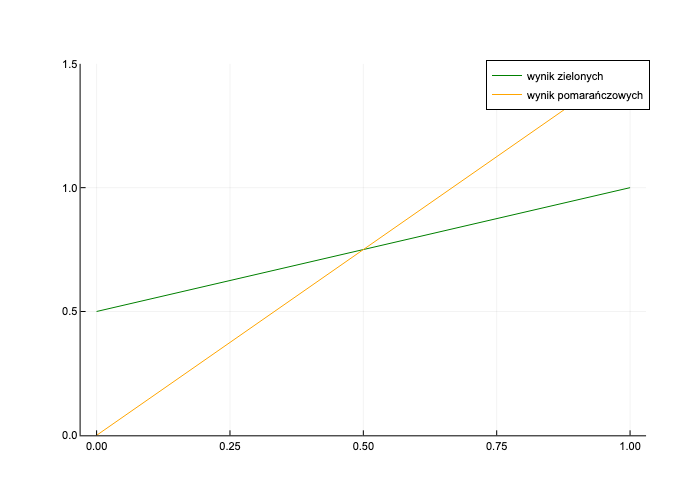

In [40]:
using Plots
xs = range(0, 1, length = 10)
zielony = 0.5 .* xs .+ 0.5
pomarańczowy = 1.5 .* xs 
plt = Plots.plot(xs, [zielony, pomarańczowy], labels = ["wynik zielonych" "wynik pomarańczowych"], color = [:green :orange],
    ylimits=(0,1.5))


Zatem dla danych z naszej symulacji, równowaga Nasha występuje, gdy liczebność populacji agresorów jest równa populacji osobników pasywnych.

## **Dylemat więźnia**
Rozważmy podobną symulację, w której inerakcje między gatunkiem agresywnym a pasywnym przebiegają zgodnie z poniższą tabelą

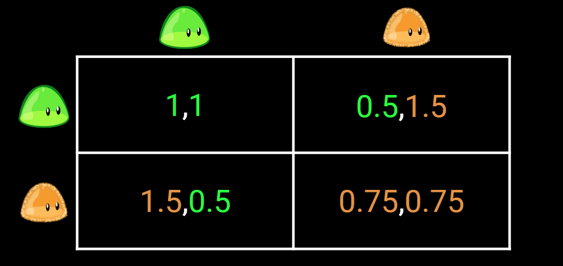

Zauważmy, że w przypadku spotkania dwóch osobników, każdy z nich będzie chciał przybrać postawę agresywną, bo w każdym, indywidualnie rozważanym przypadku jest ona lepsza, niż postawa pasywna. Prowadzi to do sytuacji, gdzie najczęstszym rodzajem interakcji będzie ta w prawym dolnym rogu, gdzie dwaj agresorzy walczą ze sobą, każdy z 3/4 szansy na przetrwanie. Co ciekawe, gdyby oba osobniki przybrały postawę pasywną, to mielibyśmy doczynienia z interakcją w lewym górnym rogu, która paradoksalnie okazuje się być dla nich korzystniejsza. Sytuacja ta jest określana w teorii gier jako **dylemat więźnia**. Pokazuje on, że najlepszy wybór dla jednostki, nie zawsze jest najkorzystniejszy dla ogółu. 

Zauważmy, że w tej sytuacji równowaga Nasha nie występuje

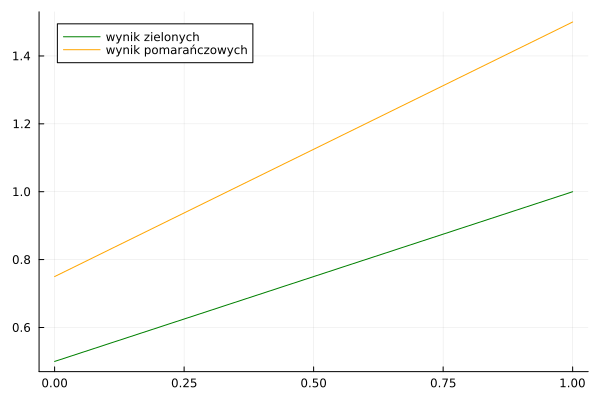

In [9]:
xs2 = range(0, 1, length = 10)
zielony2 = 0.5 .* xs2 .+ 0.5
pomarańczowy2 = 0.75 .* xs2 .+ 0.75
plt = plot(xs2, [zielony2, pomarańczowy2], labels = ["wynik zielonych" "wynik pomarańczowych"], color = [:green :orange])

## Pole testowe

### W tym miejscu może Pan pobawić się modelem i wygenerować symulację według własnych upodobań
#### A tu drobne wskazówki, żeby coś wyszło :)
* populacja_eagle oraz populacja_sep powinny być równe 0 na początku jeśli nie deklarujemy dużych początkowych populacji innych gatunków, ponieważ żerują one na innych gatunkach i znajdując nie ich a jedzenie, umierają

* można zmodyfikować liczbę dni oraz wielkość planszy, aczkolwiek symulacja dla tych parametrów okazała się dla nas najbardziej optymalna i obfita w pole do wyciągania wniosków

* w przedostatniej linijce, przy wywołaniu funkcji Zmiany_przez_dni warto, gdy dodajemy kolejno sępy oraz/lub orły, dodać ich więcej niż 1, ponieważ owy pojedynczy osobnik może łatwo umrzeć i nie wnieść nic do modelu

* ustawiona w owej funkcji jest także opcja możliwości rodzenia się altruistów z innych gatunków, jeśli nie chcemy takiej modyfikacji modelu można owe *true* usunąć, jednakże trzeba się liczyć, że wtedy nie będzie można dodać sępów (to znaczy będzie można, ale zupełnie nic to nie zmieni, ponieważ w tej modyfikacji sępy jako gatunek nie są dodane)

* z polecanych wykresów wymienilibyśmy zdecydowanie **dove oraz eagle dodany w funkcji Zmiany_przez_dni z modyfikacją true** oraz **dove oraz kruk bez modyfikacji oraz z nią**

#### Mamy nadzieję, że uda się wypróbować inny ciekawy wariant ;)

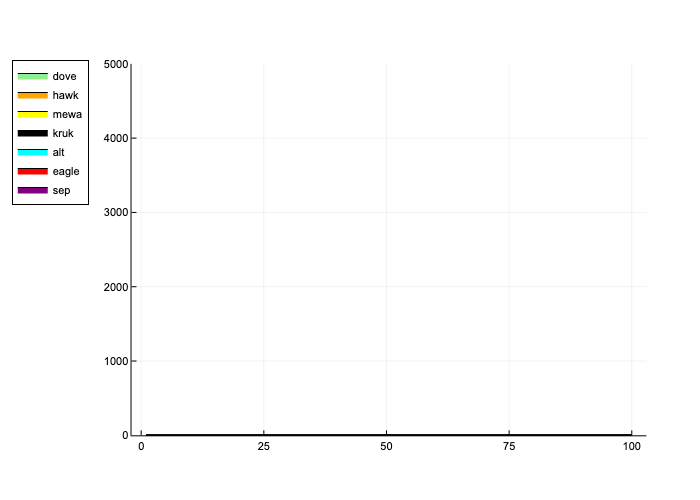

In [66]:
populacja_dove = 0
populacja_hawk = 0
populacja_mewa = 0
populacja_alt = 0
populacja_eagle = 0
populacja_kruk = 0
populacja_sep = 0
liczba_dni = 100
wielkosc_planszy = 50
zmiany = Zmiany_przez_dni(wielkosc_planszy,liczba_dni,0,0,true)
StackedArea(zmiany[1], zmiany[2], zmiany[3], zmiany[4], zmiany[5], zmiany[6], zmiany[7])